# WS 2.8: Dirty Water

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.8. Wednesday January 15, 2024.*

## Introduction

In this exercise we apply a few simple concepts from the textbook to derive a safety standard to regulate spills in a chemical factory. You are asked to consider an economic and societal standard, then make a recommendation to the city council.

## Case Study

A city with population 10,000 uses an aquifer for its water supply, as illustrated in the figure. The city owns a factory in the region that manufactures hazardous chemicals, and recently a chemical spill occurred that resulted in 10 residents getting sick and total damages of  €7,000M*. The city is going to enforce stricter regulations on the factory, and _you have been hired to advise the city council on the maximum allowable probability of a spill occurring (per year)_. You will make a recommendation based on the more stringent criteria between economic and societal risk limits.

![sketch of factory, houses and contamination plume](./sketch.png)

Experts have been consulted and it appears under the current plan the probability of a spill is 1/100 per year. The city council is considering two strategies to upgrade the spill prevention system. A small upgrade would cost €25M and can reduce spill probability by a factor 10; a large upgrade with investment costs of €50M would reduce the probability by factor 100.

The city has also considered the regulations in a nearby region which uses a maximum allowable probability of 1 person getting sick as $p_f=0.01$. The city agrees with this, however, they are very much _risk averse_ (that's a hint!), regarding spills with more significant consequences.

_*M = million, so 7,000M is 7e9, or 7 billion. All costs in this exercise are expressed in units €M._

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1:</b>  

What is best strategy in terms of total cost of the system?
</p>
</div>

_Your answer here._


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   
</p>
</div>

$$
R = p_f \cdot D
$$

where $R$ is risk and $D$ is damages (€M). The total cost, $T$, for investment $I$ is:

$$
T = I + R
$$

| Strategy | Description | Investment, $I$ | Risk, $R$ | Total Cost, $C$ |
| :---: | :---: | :---: | :---: | :---: |
| 1 | do nothing | €0M | 0.01 $\cdot$ €7000 | €70M |
| 2 | small upgrade | €25M | 0.01/10 $\cdot$ €7000 | €32M |
| 3 | large upgrade | €50M | 0.01/100 $\cdot$ €7000 | €50.7M |

Conclusion: Strategy 2 (small upgrade) is the best economically and corresponds with a safety standard of $p_f$ = 1/1000 per year.

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>End solution.</b>   
</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2:</b>  
Assuming that the number of people in a future spill would also be 10 people, what is the maximum allowable spill probability based on societal risk standards?

Make a plot of the societal risk limit and add a point for the case of the city factory.
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>
The goal is to create a limit line, <a href="https://mude.citg.tudelft.nl/2024/book/pd/risk-evaluation/safety-standards.html#limits-for-individual-and-societal-risk" target="_blank">as described here</a>. The equation is of form:
    
$$
1 - F_N(n) \leq \frac{C}{n^\alpha}
$$
    
From the information provided, we can create a limit line where one point is provided from the guidelines of the neighboring city $p_f=0.01$ and $N=1$; thus $C=0.01$. If the city is risk averse, $\alpha=2$. As the factory spill causes 10 people to get sick, the maximum allowable probability is
    
  
$$
1 - F_N(n) \leq \frac{C}{n^\alpha} = \frac{0.01}{10^2} = 10^{-4} \;\;\textrm{per year}
$$
</p>
</div>

0.0001


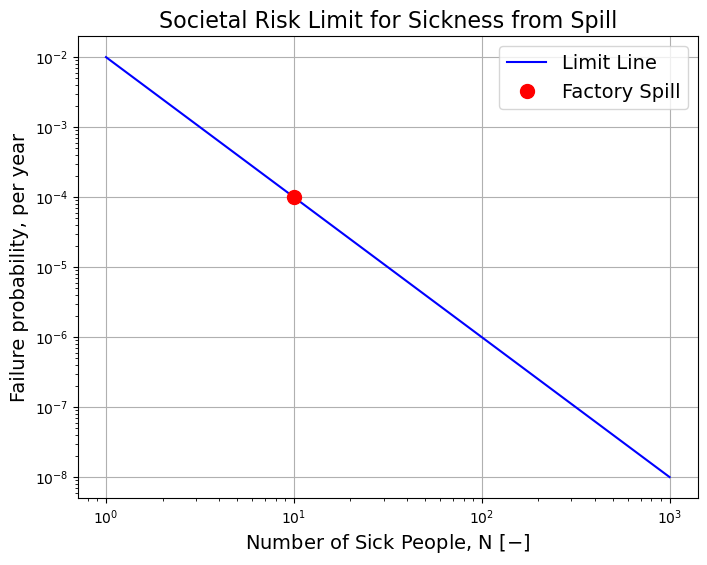

In [2]:
# C = YOUR_CODE_HERE
# alpha = YOUR_CODE_HERE

# pf_societal = YOUR_CODE_HERE
# print(pf_societal)

# N_values = YOUR_CODE_HERE
# limit_line = YOUR_CODE_HERE

# fig, ax = plt.subplots(figsize=(8, 6))
# YOUR_CODE_HERE
# YOUR_CODE_HERE
# ax.set_title('YOUR_CODE_HERE')
# ax.set_xlabel('YOUR_CODE_HERE')
# ax.set_ylabel('YOUR_CODE_HERE')
# ax.legend(fontsize=14)
# plt.yscale('log')
# plt.xscale('log')
# ax.grid(True)
# plt.show()

# SOLUTION
C = 0.01*1**2
alpha = 2

pf_societal = C/10**alpha
print(pf_societal)


N_values = np.array([1, 1000])
limit_line = C/N_values**alpha

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(N_values, limit_line, color='blue', markersize=10, label='Limit Line')
ax.plot(10, pf_societal, 'ro', markersize=10, label='Factory Spill')
ax.set_title('Societal Risk Limit for Sickness from Spill', fontsize=16)
ax.set_xlabel('Number of Sick People, N [$-$]', fontsize=14)
ax.set_ylabel('Failure probability, per year', fontsize=14)
ax.legend(fontsize=14)
plt.yscale('log')
plt.xscale('log')
ax.grid(True)
plt.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3:</b>  

Provide your advice to the polder’s authorities for the safety standard based on the outcomes of the economic analysis (Task 1) and societal risk (Task 2).

</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

Choose the most stringent of the two criteria from Task 1 and Task 2: the societal risk governs, so the city should apply a safety standard of $P_f \leq 10^{-4}$ per year. This is the more expensive option, but it is the better choice when all types of risk are considered.
</p>
</div>

## Additional Risk Analysis

It turns out that since the spill occurred an evaluation was completed by a third party company, where they identified the following scenarios, along with estimated a probability of each event occurring. The city would like you to see if it would conflict with your safety recommendations. The results of the risk analysis are provided as the probability associated with a specific number of people getting sick; that is:

$$
p = P[N=n]
$$

Specific values of $n$ and $p$ are provided in the Python code cell below.



<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 4:</b>  

Create the FN curve for the factory and compare it with the societal risk limit you determined above.
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>
<b>Hint:</b> you may find it useful to use <code>np.cumsum</code> as well as Matplotlib's <code>step</code> function (in particular, consider whether to use <code>pre</code>, <code>post</code> or <code>mid</code> for keyword argument <code>where</code>).
</p></div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

Don't forget to account for the probability of no one getting sick! It turns out $P[N=0]=0.9$.

Note also that the probabilities are provided for a specific event, $P[N=n]$. The CDF is the sum of the probabilities up to and including $n$: $P[N \leq n]$. The FN curve is the inverse of the CDF: $F_N(n) = 1 - P[N \leq n]=[N > n]$. As such, the value calculated below for <code>1 - p_cumulative</code> (the exceedance probability) applies to the right side of the point $N$. 

Here is an ad hoc way of verifying this:
- Since $P[N=0]=0.9$, then $P[N > 0]=0.1$
- Since there is no change in the exceedance probability until $N=1$, then $P[0 < N \leq 1]=0.1$
- The "jump" therefore happens at each value of $N$
- The value of exceedance probability is therefore on the _right_ side of the point $N$, thus <code>where='post'</code> is the correct choice for use of <code>step</code>. 
</p>
</div>

The probability of 0 sick people is 0.90


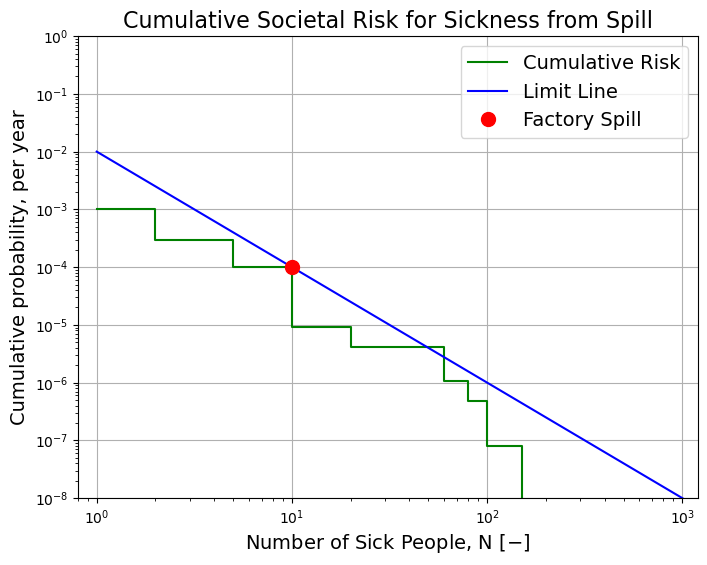

In [ ]:
# n_and_p = np.array([[1,   0.099],
#                     [2,   7e-4],
#                     [5,   2e-4],
#                     [10,  9e-5],
#                     [20,  5e-6],
#                     [60,  3e-6],
#                     [80,  6e-7],
#                     [100,  4e-7],
#                     [150, 8e-8]])

# N_plot = n_and_p[:, 0]

# p_cumulative = YOUR_CODE_HERE

# fig, ax = plt.subplots(figsize=(8, 6))
# YOUR_CODE_HERE
# YOUR_CODE_HERE
# YOUR_CODE_HERE
# ax.set_title('YOUR_CODE_HERE')
# ax.set_xlabel('YOUR_CODE_HERE')
# ax.set_ylabel('YOUR_CODE_HERE')
# ax.legend(fontsize=14)
# plt.yscale('log')
# plt.xscale('log')
# # plt.xlim(YOUR_CODE_HERE, YOUR_CODE_HERE)
# # plt.ylim(YOUR_CODE_HERE, YOUR_CODE_HERE
# ax.grid(True)
# plt.show()

# SOLUTION
n_and_p = np.array([[1,   0.099],
                    [2,   7e-4],
                    [5,   2e-4],
                    [10,  9e-5],
                    [20,  5e-6],
                    [60,  3e-6],
                    [80,  6e-7],
                    [100,  4e-7],
                    [150, 8e-8]])

N_plot = n_and_p[:, 0]

p_for_0 = 1 - n_and_p[:, 1].sum()
print(f"The probability of 0 sick people is {p_for_0:.2f}")
p_cumulative = np.cumsum(n_and_p[:, 1]) + p_for_0

fig, ax = plt.subplots(figsize=(8, 6))
ax.step(N_plot, 1-p_cumulative, where='post',
        color='green', markersize=10, label='Cumulative Risk')
ax.plot(N_values, limit_line, color='blue', markersize=10, label='Limit Line')
ax.plot(10, pf_societal, 'ro', markersize=10, label='Factory Spill')
ax.set_title('Cumulative Societal Risk for Sickness from Spill', fontsize=16)
ax.set_xlabel('Number of Sick People, N [$-$]', fontsize=14)
ax.set_ylabel('Cumulative probability, per year', fontsize=14)
ax.legend(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.8, 1200)
plt.ylim(1e-8, 1)
ax.grid(True)
plt.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 5:</b>  

As you may have noticed, the risk in the system does not satisfy your recommendation. Play with the values of $n$ and $p$ to see how you can satisfy the safety standard. Then, select a few "modifications" to the $n$ and/or $p$ values and describe how you might be able to make that change in reality. Keep in mind that making interventions to the system is expensive, so to be realistic you should try to do this by making the <em>smallest</em> change possible; in other words, find the smallest change in $n$ or $p$ separately; don't change many values all at once.

Report your findings as if they were a recommendation to the city. For example: <em>if one were to reduce $p$ of <code>something</code> from <code>value</code> to <code>value</code> by implementing <code>your plan here</code>, the FN curve would shift <code>specify direction</code>, and the safety standard would be satisfied.</em>
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>
Yes, this is an overly simplistic exercise exercise, but it is a good way to think about how to apply the concepts of risk analysis to real-world problems, and to make sure you understand the mathematics of how they are constructed. Also note that each "point" comes from a scenario; in real risk applications it can be quite involved to decide on and carry out the computations required for each scenario.
</p></div>

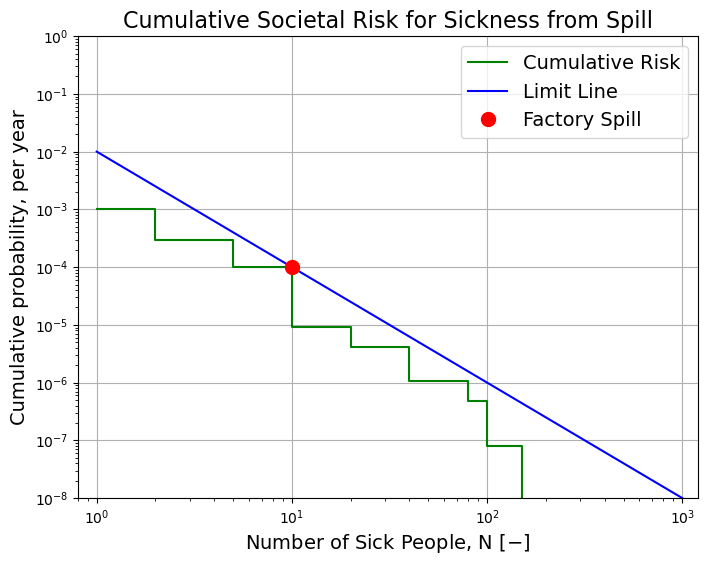

In [4]:
# n_and_p_modified = n_and_p.copy()
# n_and_p_modified[YOUR_CODE_HERE, YOUR_CODE_HERE] = YOUR_CODE_HERE

# DUPLICATE_ANALYSIS_FROM_ABOVE_WITH_MODIFIED_VALUES

# SOLUTION
n_and_p_modified = n_and_p.copy()
n_and_p_modified[5, 0] = 40

N_plot = n_and_p_modified[:, 0]

p_cumulative_modified = np.cumsum(n_and_p_modified[:, 1]) + p_for_0

fig, ax = plt.subplots(figsize=(8, 6))
ax.step(N_plot, 1-p_cumulative_modified, where='post',
        color='green', markersize=10, label='Cumulative Risk')
ax.plot(N_values, limit_line, color='blue', markersize=10, label='Limit Line')
ax.plot(10, pf_societal, 'ro', markersize=10, label='Factory Spill')
ax.set_title('Cumulative Societal Risk for Sickness from Spill', fontsize=16)
ax.set_xlabel('Number of Sick People, N [$-$]', fontsize=14)
ax.set_ylabel('Cumulative probability, per year', fontsize=14)
ax.legend(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.8, 1200)
plt.ylim(1e-8, 1)
ax.grid(True)
plt.show()

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

The easiest thing to do is reduce the event for 60 people to 40 people! Perhaps the consequences of these larger $N$ events would be to make the water supply system use water from a wider array of sources, so that if one of the sources gets contaminated, a smaller number of people are affected.

Playing with the values is straightforward, but it will initially take some time to get used to the log scale. The two types of strategies are: 1) reducing probability of a spill, and 2) reducing the number of people who get sick.

A few things that would reduce the probability of an event:
- a
- b
- c

To reduce the number of people who get sick, one could:
- a
- b
- c

</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 6:</b>  

Calculate the expected number of people getting sick per year for the factory under the current conditions.

<em>Note that we don't do anything with this calculation in this assignment, but it is often a useful way to quantify the risk of a system, or, for example, comparing two or more types of systemts; various factories, in this case.</em>

</p>
</div>

In [5]:
# YOUR_CODE_HERE

# SOLUTION
expected_value = np.sum(n_and_p[:, 0]*n_and_p[:, 1])
print(f"The expected number of sick people is {expected_value:.2f} per year")
expected_value_modified = np.sum(n_and_p_modified[:, 0]*n_and_p_modified[:, 1])
print("After making modifications:")
print(f"    expected number of sick people is {expected_value_modified:.2f} per year")

The expected number of sick people is 0.10 per year
After making modifications:
    expected number of sick people is 0.10 per year


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

Looks like the expected value is 0.10 people per year. This is a small number. Perhaps if you saw this value alone, you would think the situation is not that bad, but the use of the FN curve says otherwise!

It is also interesting that the expected value does not change after the system is modified to meet the safety requirement. Although this result may change, depending on whether your own modification is different from that in the solution.

</p>
</div>

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->